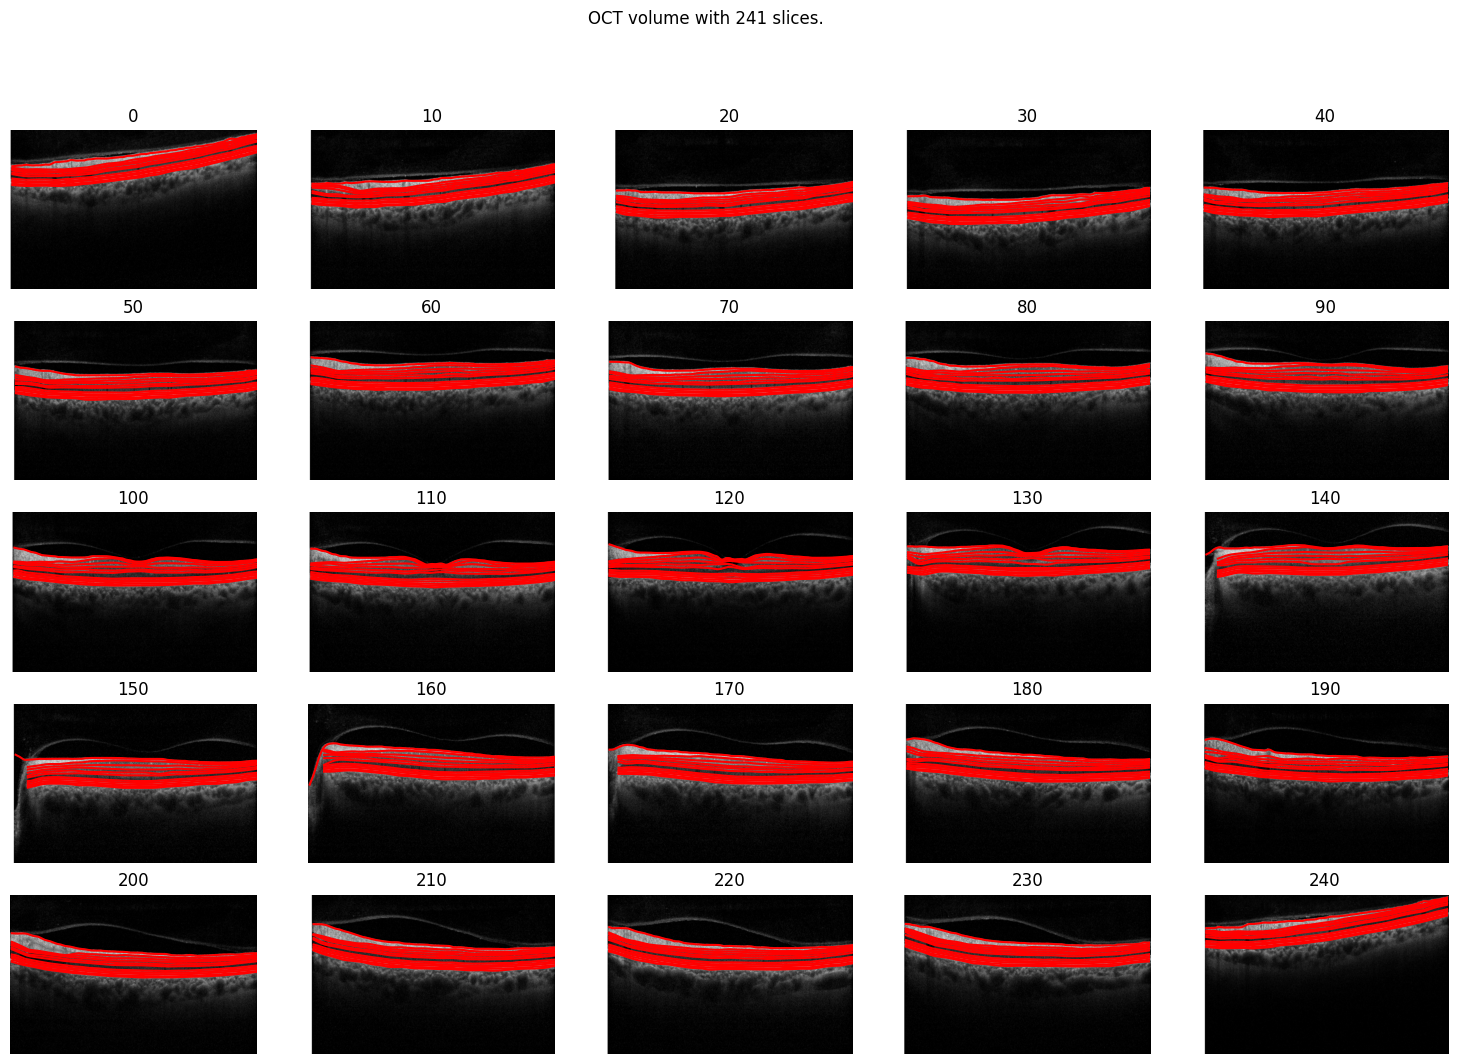

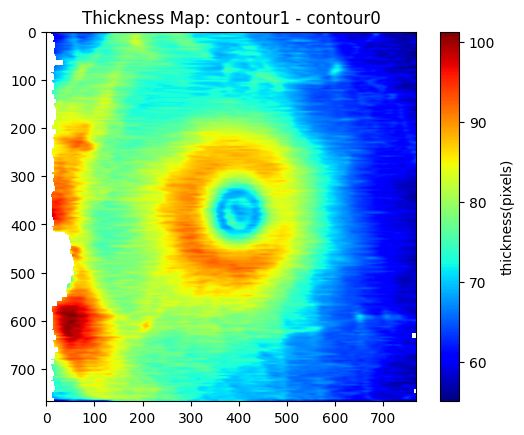

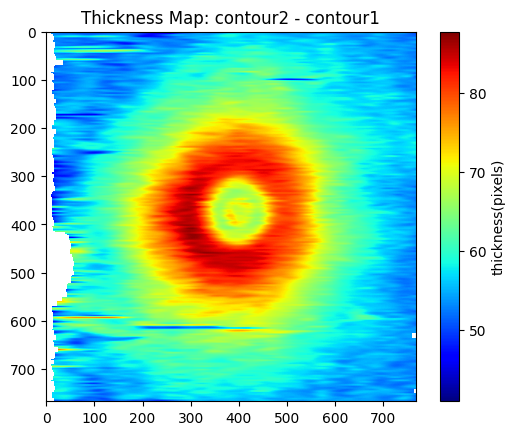

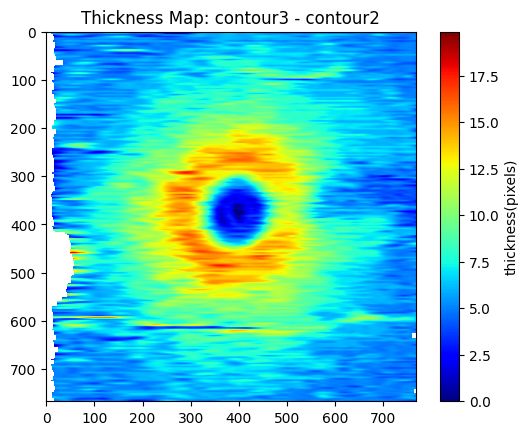

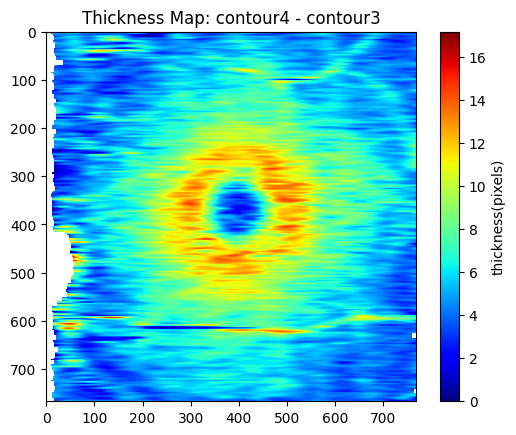

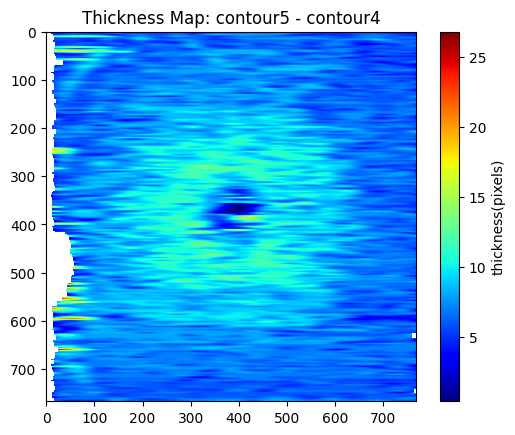

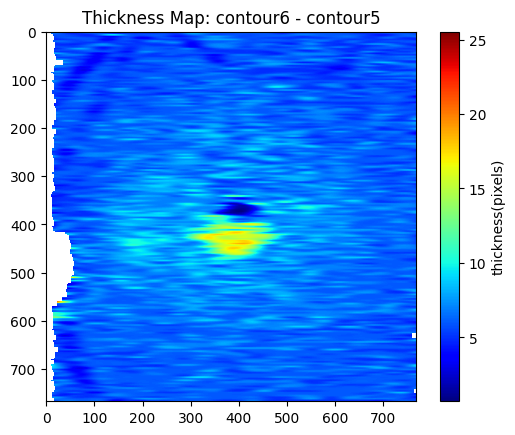

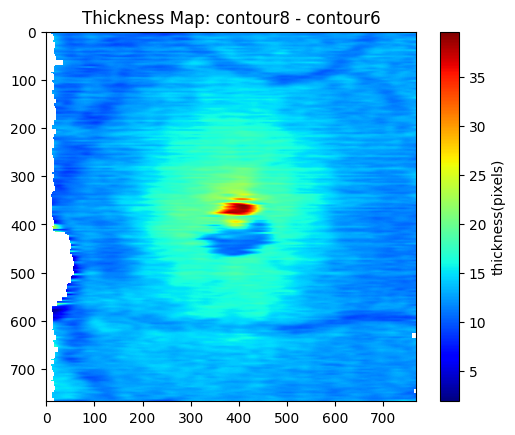

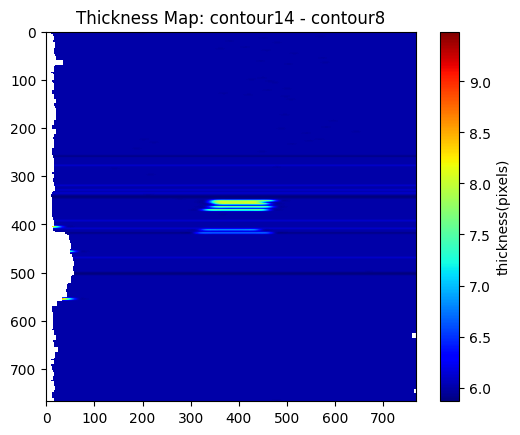

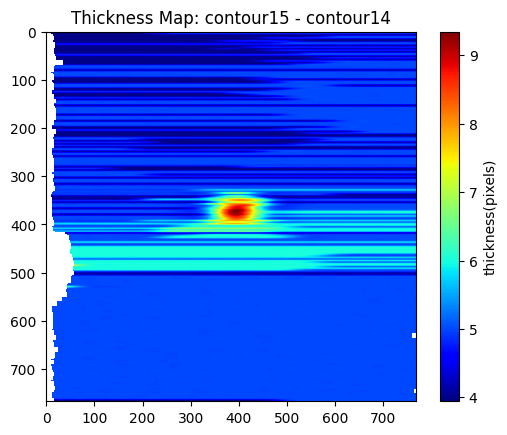

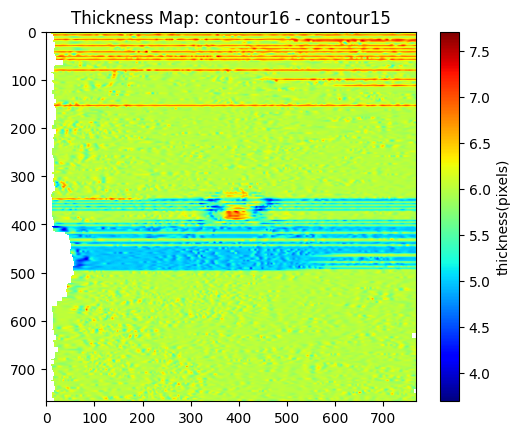

In [1]:
!pip install oct-converter
import cv2
import numpy as np
from matplotlib import pyplot as plt, cm
from oct_converter.readers import E2E

filepath = "PRECLiv001_3M_FE.E2E"
file = E2E(filepath)
oct_volumes = (file.read_oct_volume())
image_sizes = []

for volume in oct_volumes:
    volume.peek(show_contours=True)
    volume.save("{}_{}.avi".format(volume.volume_id, volume.laterality))
    fundus_images = file.read_fundus_image()
    
    for image in fundus_images:
        image.save("{}+{}.png".format(image.image_id, image.laterality))
        img = cv2.imread("{}+{}.png".format(image.image_id, image.laterality))
        image_size = img.shape[:2]
        image_sizes.append(image_size)

for layer_idx in range(1, len(oct_volumes[0].contours)):
    layer_name_1 = list(oct_volumes[0].contours.keys())[layer_idx - 1]
    layer_name_2 = list(oct_volumes[0].contours.keys())[layer_idx]
    
    contours_1 = volume.contours[layer_name_1]
    contours_2 = volume.contours[layer_name_2]
    
    thickness_maps = []
    
    for i in range(volume.num_slices):
        first_contour = contours_1[i]
        second_contour = contours_2[i]
        diff = np.subtract(first_contour, second_contour)
        thickness_maps.append(np.abs(diff))
    
    thickness_maps_resized = cv2.resize(np.array(thickness_maps), (768, 768))
    plt.imshow(thickness_maps_resized, cmap='jet')
    plt.colorbar(label='thickness(pixels)')
    plt.title(f"Thickness Map: {layer_name_2} - {layer_name_1}")
    plt.show()
